# Mathematics for Machine Learning

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## PyTorch Introduction

In [8]:
# Creating tensors in PyTorch
#very similar to tensorflow

#a tensor is basically the pytorch/tf version of an array

tensor_a = torch.tensor([1, 2, 3])
tensor_b = torch.tensor([[1, 2, 3], [4, 5, 6]])

print("Tensor a:", tensor_a)
print("Tensor a shape:", tensor_a.shape)
print('\n')
print("Tensor b:", tensor_b)
print("Tensor b shape:", tensor_b.shape)

Tensor a: tensor([1, 2, 3])
Tensor a shape: torch.Size([3])


Tensor b: tensor([[1, 2, 3],
        [4, 5, 6]])
Tensor b shape: torch.Size([2, 3])


In [9]:
# Basic operations

#adds element wise
sum_tensors = tensor_a + tensor_b[0]
product_tensors = tensor_a * 2

print("Sum of tensors:", sum_tensors)
print("Tensor multiplied by 2:", product_tensors)

Sum of tensors: tensor([2, 4, 6])
Tensor multiplied by 2: tensor([2, 4, 6])


In [17]:
# Reshaping tensors

reshaped_tensor = tensor_b.view(3, 2)   # Equivalent to tensor_b.reshape(3,2)
print("Reshaped tensor b:", reshaped_tensor)
print("Reshaped tensor b shape:", reshaped_tensor.shape)

Reshaped tensor b: tensor([[1, 2],
        [3, 4],
        [5, 6]])
Reshaped tensor b shape: torch.Size([3, 2])


In [29]:
#Squeezing

#unsqueeze adds an extra dimension like in tensorflow add_dim, along the desired axis
#0 for row, 1 for col etc
print(tensor_a.shape)
print(tensor_a.unsqueeze(0))
print(tensor_a.unsqueeze(0).shape)
print(tensor_a.shape)
print(tensor_a.unsqueeze(1))
print(tensor_a.unsqueeze(1).shape)


torch.Size([3])
tensor([[1, 2, 3]])
torch.Size([1, 3])
torch.Size([3])
tensor([[1],
        [2],
        [3]])
torch.Size([3, 1])


In [30]:
# Concatenating tensors

print("Tensor a shape:", tensor_a.shape)
print("Tensor b shape:", tensor_b.shape)

print(50*'-')

try:
  torch.cat([tensor_a, tensor_b])
except Exception as e:
  print(e)

print(50*'-')


#then we can actually concatenate them along row, since we add an extra dimension to row

tensor_cat = torch.cat([tensor_a.unsqueeze(0), tensor_b], dim=0)
print(tensor_cat)
print("Tensor cat shape:", tensor_cat.shape)

Tensor a shape: torch.Size([3])
Tensor b shape: torch.Size([2, 3])
--------------------------------------------------
Tensors must have same number of dimensions: got 1 and 2
--------------------------------------------------
tensor([[1, 2, 3],
        [1, 2, 3],
        [4, 5, 6]])
Tensor cat shape: torch.Size([3, 3])


### Automatic differentiation

In [4]:
# Autograd: Automatic Differentiation
#requires_grad allows us to do the automatic differentiation
x = torch.tensor(2.0, requires_grad=True)
def y_func(x):
  return x**2 + 3*x + 1 + torch.sin(x**2)

y = y_func(x)

#extract grad as attribute
print('Gradient before backward call:', x.grad)
print(50*'-')

#.backward is needed to find the gradient, it relates to neural networks
#we call it, then to get the value, we do x.grad where y is the function of x
#since when called, the gradient is stored in the original x.grad
#if we do backward of the final value, it computes the grad of x
# Compute gradients
y.backward()


# Gradient of y with respect to x
print("dy/dx at x = 2:", x.grad)

#compare with actual:
def grad_actual(x):
    return 2*x + 3 + 2 * x* torch.cos(x**2)

print(grad_actual(x))


Gradient before backward call: None
--------------------------------------------------
dy/dx at x = 2: tensor(4.3854)
tensor(4.3854, grad_fn=<AddBackward0>)


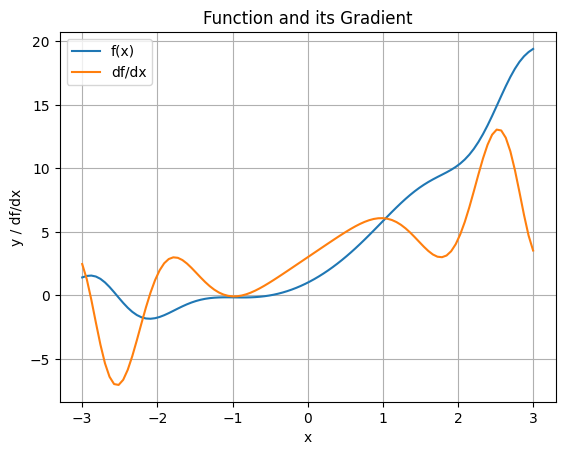

In [7]:
#We can use autodifferentiation to find the derivative over a domain

# Generating a range of values
#again we need to specify that we are going to be doing the gradient
x = torch.linspace(-3, 3, steps=100, requires_grad=True)

# Applying the function
y = y_func(x)

# Prepare to store gradients
grads = torch.zeros_like(x)

# Calculate gradients for each element in x
#since backward only works for a scalar, so for vectors, we must iterate, remembering that it deletes them after
for i in range(x.size(0)):

    # Calculate the function and backpropagate on each element, then it stores in the x bit
    y[i].backward(retain_graph=True)

    # Store the computed gradient
    grads[i] = x.grad[i]

# Plotting
plt.plot(x.detach().numpy(), y.detach().numpy(), label='f(x)')
plt.plot(x.detach().numpy(), grads.numpy(), label='df/dx')
plt.xlabel('x')
plt.ylabel('y / df/dx')
plt.legend()
plt.grid()
plt.title('Function and its Gradient')
plt.show()

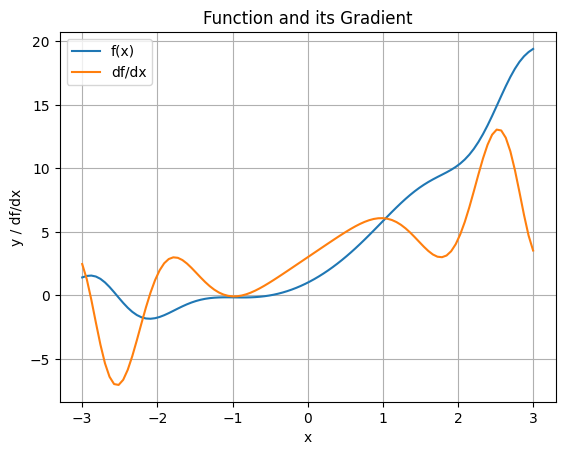

In [8]:
#We can use autodifferentiation to find the derivative over a domain

# Generating a range of values
#again we need to specify that we are going to be doing the gradient
x = torch.linspace(-3, 3, steps=100, requires_grad=True)

# Applying the function
y = y_func(x)

# Calculate gradients for each element in x
#since backward only works for a scalar, so for vectors, we must iterate, remembering that it deletes them after
#of just do sum
a = y.sum().backward()
grads = x.grad
# Plotting
plt.plot(x.detach().numpy(), y.detach().numpy(), label='f(x)')
plt.plot(x.detach().numpy(), grads.numpy(), label='df/dx')
plt.xlabel('x')
plt.ylabel('y / df/dx')
plt.legend()
plt.grid()
plt.title('Function and its Gradient')
plt.show()

In [5]:
x = torch.tensor([0.2,0.8,0.9,0.3,0.2])                     # input tensor
y = torch.tensor([0,1,1,0,0]).to(dtype=torch.float32)       # expected output

# Weights and biases b + w^T x for linear regression, again we want to differentiate so need grad
w = torch.randn(5, 5, requires_grad=True)
b = torch.randn(5, requires_grad=True)

learning_rate = 0.1

for _ in range(5):
    
#z is the output of the model
  z = torch.matmul(x, w)+b
  loss = torch.norm(y-z)
  loss.backward()

    #explained later 
  with torch.no_grad():
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad

    # Zero gradients after updating
    w.grad.zero_()
    b.grad.zero_()

#want this to converge to y
torch.matmul(x, w) +b

tensor([-0.1464, -0.5805, -0.0146,  0.7909, -0.3038], grad_fn=<AddBackward0>)

## Object Oriented Programming

In [34]:
class TensorOperations:

  def __init__(self, data):

      self.data = data
      print('Class initialised')

  def add_scalar(self, scalar):
      return self.data + scalar

  def update_data(self, new_data):
      self.data = new_data

  def mean(self):
      return torch.mean(self.data, dim=1)


In [35]:
#repeat repeats until shape is aquired
tensor1 = torch.linspace(0,10, 11).repeat(5,1)

print(tensor1)
print(50*'-')

# Initalising class
class1 = TensorOperations(tensor1)

# Accessing an attribute
print(class1.data)



tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])
--------------------------------------------------
Class initialised
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])


In [37]:
# Testing a method
value = class1.add_scalar(3)
print(value)
print(50*'-')
print(class1.data)

tensor([[ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.],
        [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.],
        [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.],
        [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.],
        [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]])
--------------------------------------------------
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])


In [39]:
# Testing another method
class1.update_data(torch.randn(5,11))
class1.data

tensor([[-0.5877,  0.5337, -0.5884,  2.1248, -0.0676,  0.9949,  0.3135,  0.0561,
         -0.6876,  0.8192, -1.0842],
        [ 1.5672,  1.2944,  0.1578, -1.5909,  1.8436, -0.8427,  1.0440, -1.5190,
          0.7638,  1.4250, -2.0068],
        [ 0.2574, -0.8801,  0.3913,  0.2380,  0.7152,  0.7513, -1.4864, -1.1430,
         -0.8927,  2.3338,  1.1636],
        [-0.7644,  0.3042, -1.3819, -0.9683, -1.2336, -0.7800,  0.5647, -0.9959,
          0.1106, -0.6624,  0.4485],
        [-0.5958,  1.1686, -1.2148, -0.9406, -0.0270,  0.1458,  0.8309, -2.6065,
          1.6906, -0.1084, -3.5389]])

In [40]:
class1.data = torch.randn(5,11)+10.  # Another way to modify data
class1.data

tensor([[ 8.7543,  9.5065,  9.8051,  8.6099,  8.7979,  9.9956, 10.4447, 10.5767,
         10.0317,  7.2827,  9.2564],
        [ 9.0632, 10.9786,  8.9837,  9.0076,  8.7338,  8.6000,  9.3864,  9.0887,
          9.6756, 10.6398,  9.0167],
        [ 8.2819, 10.2123,  9.5959,  8.8638, 10.9930, 11.2986,  9.4156, 11.7199,
         10.4527, 11.0170,  9.8881],
        [ 9.5448, 10.2903, 10.8674,  9.7985, 10.7395,  9.5991, 10.6525,  9.8127,
         11.6927,  9.4722, 10.0600],
        [10.0941, 10.4205,  7.8324,  8.6266,  9.5545, 11.9114, 10.2892,  7.9303,
          9.9885,  9.0840,  9.5367]])

In [14]:
# Inheritance

class AdvancedTensorOperations(TensorOperations):
    def __init__(self, data):
        super().__init__(data)

    def sum_of_elements(self):
        return torch.sum(self.data, dim=1)

    def product_of_elements(self):
        return torch.prod(self.data, dim=0)


In [15]:
class2 = AdvancedTensorOperations(tensor1)
print(class2.sum_of_elements())
print(class2.product_of_elements())
print(50*'-')
print(class2.mean()) # This method is defined in the parent class

Class initialised
tensor([55., 55., 55., 55., 55.])
tensor([0.0000e+00, 1.0000e+00, 3.2000e+01, 2.4300e+02, 1.0240e+03, 3.1250e+03,
        7.7760e+03, 1.6807e+04, 3.2768e+04, 5.9049e+04, 1.0000e+05])
--------------------------------------------------
tensor([5., 5., 5., 5., 5.])


In [16]:
class CumulativeTensorOperations(TensorOperations):
    def __init__(self, data, alpha=3):
        super().__init__(data)
        self.alpha = alpha

    def cumsum_of_elements(self):
        return torch.cumsum(self.data, dim=1) * self.alpha


class3 = CumulativeTensorOperations(tensor1, alpha=2)
print(class3.cumsum_of_elements())
print(50*'-')

try:
  class3.product_of_elements() # It doesn't inherit the methods from AdvancedTensorOperations
except Exception as e:
  print(e)

Class initialised
tensor([[  0.,   2.,   6.,  12.,  20.,  30.,  42.,  56.,  72.,  90., 110.],
        [  0.,   2.,   6.,  12.,  20.,  30.,  42.,  56.,  72.,  90., 110.],
        [  0.,   2.,   6.,  12.,  20.,  30.,  42.,  56.,  72.,  90., 110.],
        [  0.,   2.,   6.,  12.,  20.,  30.,  42.,  56.,  72.,  90., 110.],
        [  0.,   2.,   6.,  12.,  20.,  30.,  42.,  56.,  72.,  90., 110.]])
--------------------------------------------------
'CumulativeTensorOperations' object has no attribute 'product_of_elements'


## GPU runtime - Google Colab

In [41]:
if torch.cuda.is_available():
  print("GPU available")

else:
  print("GPU not available")

GPU not available


In [42]:
ones_vec = torch.ones(2, 2)
print(ones_vec.device)

cpu


In [43]:
# Setting default device as cuda. It won't run if cuda is not available. Change runtime first.
torch.set_default_device('cuda')

ones_vec = torch.ones(2, 2)
print(ones_vec.device)


AssertionError: Torch not compiled with CUDA enabled

In [20]:
# For more flexibility in the code

device_cpu = 'cpu'
device_cuda = 'cuda'

vec1 = torch.randn(2,3, device=device_cuda)
print('Device 1:', vec1.device)
print(25*'-')

vec1 = vec1.to(device=device_cpu)
print('Device 2:', vec1.device)
print('Dtype 2:', vec1.dtype)
print(25*'-')

vec1 = vec1.to(device=device_cuda, dtype=torch.float64)
print('Device 2:', vec1.device)
print('Dtype 2:', vec1.dtype)


Device 1: cuda:0
-------------------------
Device 2: cpu
Dtype 2: torch.float32
-------------------------
Device 2: cuda:0
Dtype 2: torch.float64


### Brownian motion

 $W_t$ brownian motion if $W_t\sim \mathcal{N}(0, \sqrt{t})$

 For teaching purpose we are going to construct the brownian motion this way:

 $dW \sim \mathcal{N}(0, \sqrt{dt})$ and $W_t = \int_0^t dW_s$ with $W_0=0$

In [44]:
# Constructing a geomeric brownian motion
torch.set_default_device('cpu')

dt = 0.1

#
try:
  sqrt_dt = torch.sqrt(dt)
except Exception as e:
  print(e)

sqrt(): argument 'input' (position 1) must be Tensor, not float


In [45]:
dt = torch.tensor([0.1])
random_gen = torch.randn(100, 10, device=device_cuda) # Generating the random variables

#
try:
  dW = torch.sqrt(dt) * random_gen
except Exception as e:
  print(e)

NameError: name 'device_cuda' is not defined

In [23]:
try:
  dW = random_gen * torch.sqrt(dt).to(device=device_cuda)
  W = dW.cumsum(dim=1)
  W = torch.cat([torch.zeros(W.shape[0], 1, device=W.device), W], dim=1)
  print(W[:3,:])
except Exception as e:
  print(e)


tensor([[ 0.0000, -0.5168,  0.0843,  0.0453, -0.2275, -0.0686,  0.0379, -0.1435,
         -0.0751,  0.2456,  0.6105],
        [ 0.0000, -0.4196, -0.5115, -0.3738, -0.4578, -0.0343,  0.0221,  0.1992,
          0.4084,  0.4597,  0.9078],
        [ 0.0000,  0.3264,  0.3737,  0.5235,  0.7934,  0.7765,  0.9512,  1.0449,
          0.8480,  0.4502,  0.1956]], device='cuda:0')


can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
----------------------------------------------------------------------------------------------------


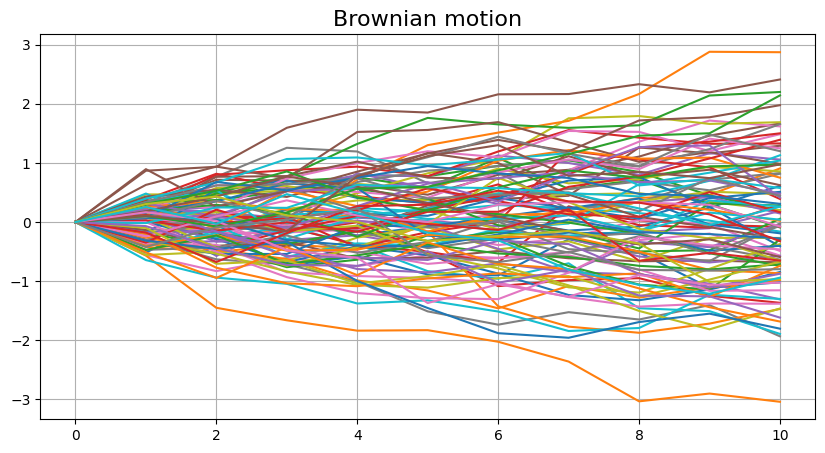

In [24]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
try:
  plt.plot(W.T)
except Exception as e:
  print(e)
  print(100*'-')

ax.plot(W.cpu().numpy().T)
ax.set_title('Brownian motion', fontsize=16)
ax.grid()
plt.show()

## Geometric Brownian Motion - putting things together (if time permits)

$$dX_t=\mu X_tdt+\sigma X_tdW_t$$

where $\mu$, $\sigma\in\mathbb{R}$ and $W_t-W_s\sim\mathcal{N}(0, t-s)$.

Although it has a closed formula, we will use a Euler discretisation for the simulation.

$$X_{t+1}=X_t+\mu X_t dt+\sigma X_tdW_t$$

In [25]:
class GBM:

  """
  Class representing a Geometric Brownian Motion (GBM) model.

  Attributes:
  -----------
  device : torch.device
      The device (CPU or GPU) used for tensor computations.
  mu : float
      The drift coefficient of the GBM.
  sigma : float
      The volatility (standard deviation) coefficient of the GBM.
  x0 : float
      The initial value of the process.
  dt : torch.tensor
      The time step for the simulation.
  paths : torch.tensor
      The simulated paths of the GBM.
  """

  def __init__(self, mu, sigma, x0=1., dt=0.01, device='cpu'):
      """
      Initializes the GBM model with specified parameters.

      Parameters:
      ----------
      mu : float
          The expected return rate of the asset.
      sigma : float
          The standard deviation of the returns (volatility).
      x0 : float, optional
          The initial price of the asset (default is 1).
      dt : float, optional
          The time step for the simulation (default is 0.01).
      device : str, optional
          The device for computations, either 'cpu' or 'cuda' (default is 'cpu').
      """
      self.device = torch.device(device)

      self.mu = mu
      self.sigma = sigma
      self.x0 = x0
      self.dt = torch.tensor([dt], device=self.device)

      self.paths = None


  def simulate(self, n_paths=50, n_steps=20, return_paths=False):
      """
      Simulates the GBM paths.

      Parameters:
      ----------
      n_paths : int, optional
          The number of paths to simulate (default is 50).
      n_steps : int, optional
          The number of time steps for each path (default is 20).

      Returns:
      -------
      torch.tensor
          The simulated paths of the GBM, if return_paths is True.
      """
      paths = torch.zeros(n_paths, n_steps+1, device=self.device)
      paths[:,0] = self.x0

      # Incremental Brownian motion
      dW = torch.randn(n_paths, n_steps, device=self.device) * torch.sqrt(self.dt)

      for i in range(1, n_steps+1):
          paths[:,i] = paths[:,i-1] + self.mu * paths[:,i-1] * self.dt + \
                        self.sigma * paths[:,i-1] * dW[:,i-1]

      self.paths = paths
      print('Simulation done')


  def to(self, device):
      """
      Changes the device of the model and its data.

      Parameters:
      ----------
      device : str
          The target device, either 'cpu' or 'cuda'.
      """
      self.device = torch.device(device)
      self.dt = self.dt.to(device=device)

      if self.paths is not None:
          self.paths = self.paths.to(device=device)


  def plot(self):
      """
      Plots the simulated GBM paths.
      """
      if self.paths is None:
          raise RuntimeError("Paths have to be simulated first")

      plt.figure(figsize=(10,6), constrained_layout=True)
      plt.plot(self.paths.cpu().numpy().T)
      plt.grid()
      plt.title('Geometric Brownian motion with mu={}, sigma={}'.format(self.mu, self.sigma))
      plt.show()

In [26]:
gbm1 = GBM(0.05,0.15, device='cpu')

In [27]:
gbm1.simulate(n_paths=100)

Simulation done


In [28]:
gbm1.to(device='cuda')

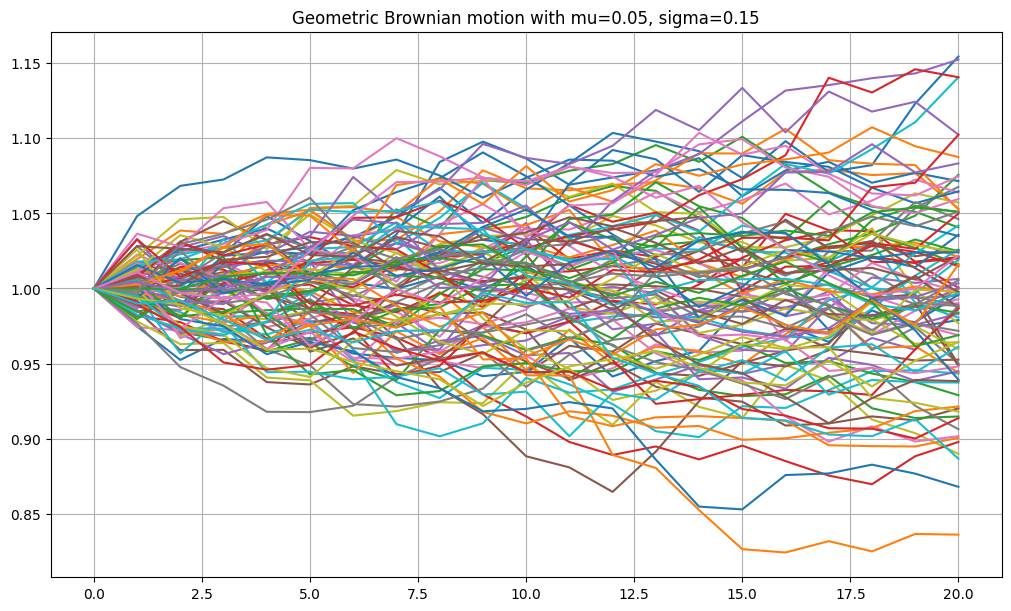

In [29]:
gbm1.plot()

In [30]:
# For those who are interested....

class GBM_4finance(GBM):

  def __init__(self, mu, sigma, x0=1., dt=0.01, device='cpu'):

    super().__init__(mu, sigma, dt=dt, device=device)

    self.x0 = torch.tensor([x0], requires_grad=True)

  def price(self):
      """
      Computes the mean price of a derivative at maturity.

      The price is calculated as the mean of the maximum of the difference
      between the final simulated asset prices and a strike price (assumed here as 1).

      Returns:
      -------
      torch.Tensor
          The mean price of the derivative.
      """
      # Calculate the mean price of the derivative at maturity
      return torch.max(self.paths[:, -1] - 1., torch.zeros_like(self.paths[:, -1], device=self.device)).mean()

  def compute_delta(self):
      """
      Computes the delta of an option.

      Delta is a measure of an option's sensitivity to a change in the price of the underlying asset.
      It is computed as the gradient of the option's price with respect to the initial asset price.

      Returns:
      -------
      float
          The delta value of the option.
      """
      # Compute the price and its gradient
      price_ = self.price()
      price_.backward()

      # Return the gradient (delta) as a scalar
      return self.x0.grad.item()


In [31]:
gbm2 = GBM_4finance(0.04,0.15)
gbm2.simulate(n_paths=100)
gbm2.compute_delta()

Simulation done


0.567821741104126